In [1]:
import numpy as np
import pandas as pd

In [10]:
marks=pd.read_excel("Students_marks.xlsx")
marks.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#Using "seaborn" to create a "jointplot" to compare the "Time in hours spent" to the "scores obtained by the students" columns. To see how the correlation make sense..

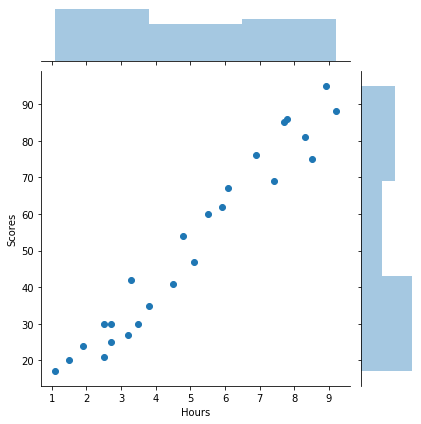

In [15]:
import seaborn as sns
sns.jointplot(x="Hours",y="Scores",data=marks,kind="scatter")

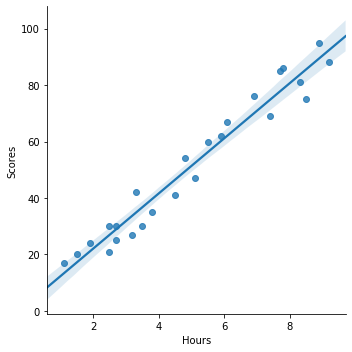

In [17]:
sns.lmplot(x='Hours',y='Scores',data=marks)

#From the above graphs, we can say that there exists a linear relation between the "time spent in hours" to the "scores obtained" by the students.

In [18]:
#Preparation of data

X = marks.iloc[:, :-1].values  
y = marks.iloc[:, 1].values

In [ ]:
#Divided the data into attributes(input) and output variables

In [19]:
X.shape,y.shape

((25, 1), (25,))

In [22]:
#Training the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
#Defining the model

from sklearn.linear_model import LinearRegression

In [24]:
#Creating an instance of linear regression model

lm=LinearRegression()

In [25]:
#Fit the model onto the training data

lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Predicting test data

#Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [32]:
predictions=lm.predict(X_test)
predictions

array([27.01878177, 78.84466226, 39.97525189, 75.85470762, 56.91832821,
       49.94176737, 33.99534261, 86.81787465])

In [37]:
#Comparing actual vs predicted values

df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
df 

,Actual,Predicted
0,30,27.018782
1,85,78.844662
2,35,39.975252
3,69,75.854708
4,60,56.918328
5,54,49.941767
6,27,33.995343
7,75,86.817875


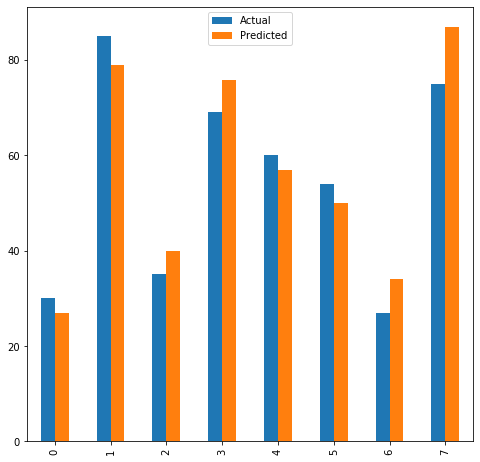

In [47]:
#Plot the bar chart to show the actual and predicted values

df.plot(kind="bar",figsize=(8,8))
plt.show()

Text(0, 0.5, 'Y_predicted')

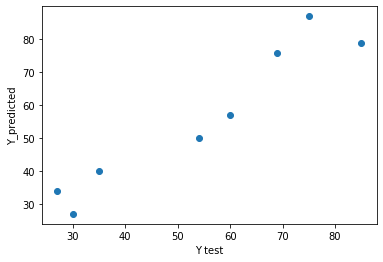

In [33]:
#Creating a scatterplot of the real test values versus the predicted values

import matplotlib.pyplot as plt

plt.scatter(y_test,predictions)
plt.xlabel('Y test')
plt.ylabel('Y_predicted')

In [34]:
#Evaluating the model

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.864954643694258
MSE: 41.63486564552886
RMSE: 6.452508476982333


In [43]:
#Check for the accuracy

print('Training Score')
print(lm.score(X_train, y_train))

print('Test Score')
print(lm.score(X_test, y_test))

Training Score
0.9662064488954938
Test Score
0.8999124290533055


In [46]:
#What will be predicted score if a student studies for 9.25 hrs/ day? 

print('Score of student who studied for 9.25 hours a day', lm.predict([[9.25]]))

Score of student who studied for 9.25 hours a day [94.29276126]


Hence, from the linear regression model built, we can check for our own data to get the marks obtained by the student.